# Problem Statement:

You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out.



In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [44]:
df = pd.read_csv('Ecommerce_Customers.csv')

In [45]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


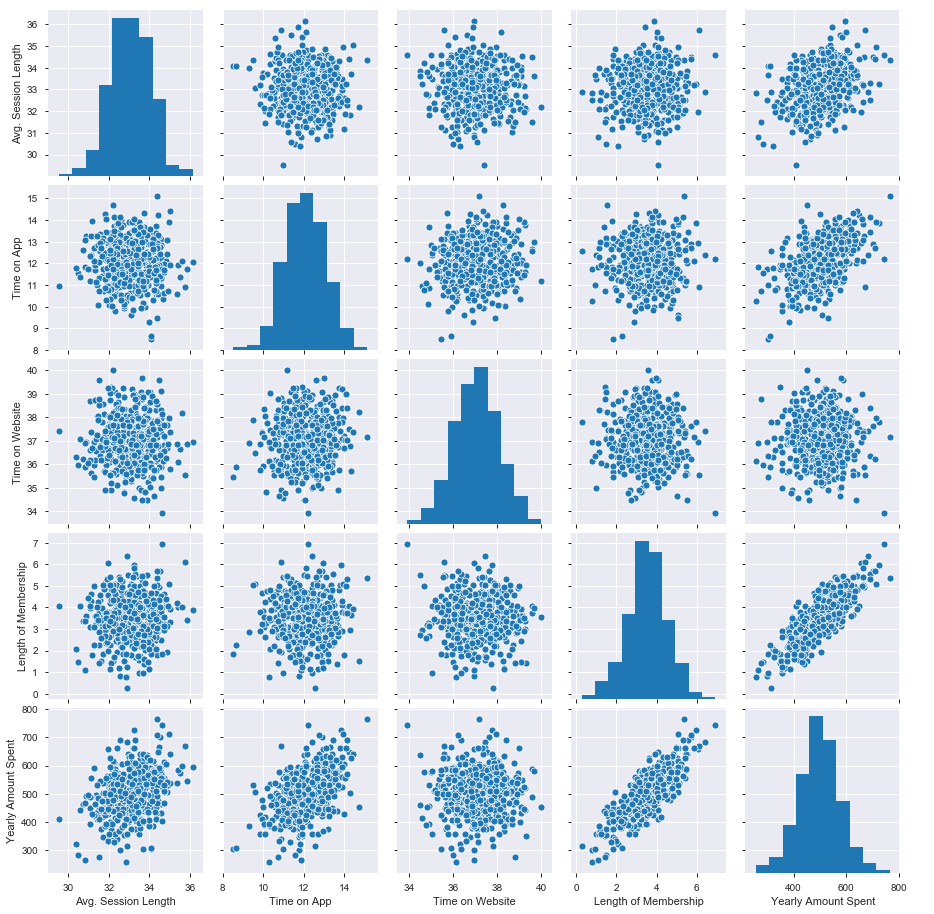

In [47]:
sns.pairplot(df)

In [48]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


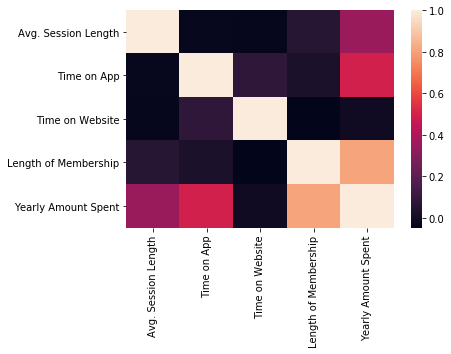

In [7]:
sns.heatmap(df.corr())

In [49]:
import pandas_profiling

In [50]:
pandas_profiling.ProfileReport(df)

Number of variables,8
Number of observations,500
Total Missing (%),0.0%
Total size in memory,31.3 KiB
Average record size in memory,64.2 B
Numeric,5
Categorical,1
Boolean,0
Date,0
Text (Unique),2
Rejected,0


In [51]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

C:\Users\Akshara\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


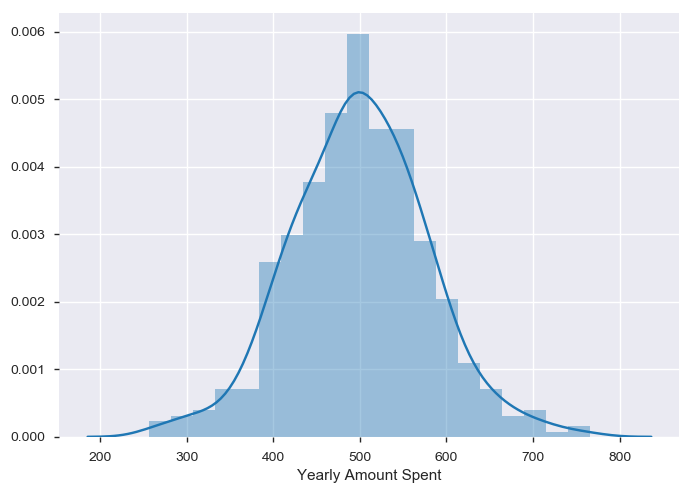

In [52]:
sns.distplot(df['Yearly Amount Spent'])

In [68]:
X = df.drop(['Email','Address', 'Avatar','Yearly Amount Spent'],axis=1)
y = df['Yearly Amount Spent']

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4, random_state=101)

In [71]:
X_train.shape

(300, 4)

In [72]:
X_test.shape

(200, 4)

### Normalizing the data

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scx = StandardScaler()

In [75]:
X_train_std = scx.fit_transform(X_train)

In [76]:
X_train_std

array([[ 1.26799522,  1.45940118,  0.23617032,  0.09143508],
       [ 1.09362244,  1.22111315,  1.88136988, -0.283246  ],
       [-1.75352154,  0.1119345 , -1.69436204, -0.44196072],
       ...,
       [-1.1990249 ,  0.46066757,  0.38023355, -0.53918796],
       [ 0.83265112, -0.46928258,  0.02145387,  0.19843404],
       [-0.84063534, -0.67939728,  1.18861913,  1.29228412]])

In [77]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [78]:
lr = LinearRegression()

### Fitting non-normalized training data into linear regression

In [79]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
lr.coef_

array([25.69154034, 37.89259966,  0.56058149, 61.64859402])

In [81]:
lr.intercept_

-1045.1152168245742

In [82]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

### Prediction

In [83]:
predictions = lr.predict(X_test)

In [85]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
18,32.187812,14.715388,38.244115,1.516576
361,32.077590,10.347877,39.045156,3.434560
104,31.389585,10.994224,38.074452,3.428860
4,33.330673,12.795189,37.536653,4.446308
156,32.294642,12.443048,37.327848,5.084861
350,33.304337,12.692661,37.333591,3.827376
32,32.175501,13.387492,35.694175,4.343063
205,34.967610,13.919494,37.952013,5.066697
81,34.594021,10.947259,35.883994,3.159754
414,32.381035,12.433129,37.626907,4.334001


### Error metrics without normalization

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [87]:
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))
print(r2_score(y_test,predictions))

7.74267128583873
93.83297800820101
9.686742383701603
0.9855061240024658


In [88]:
lr_std = LinearRegression()

### Fitting normalized training data into linear regression

In [89]:
lr_std.fit(X_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [91]:
lr.coef_

array([25.69154034, 37.89259966,  0.56058149, 61.64859402])

In [92]:
lr_std.coef_

array([25.9407292 , 35.70914747,  0.53291272, 61.71966787])

In [93]:
X_test_std = scx.transform(X_test)

In [94]:
predictions1 = lr_std.predict(X_test_std)

In [95]:
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))
print(r2_score(y_test,predictions))

7.74267128583873
93.83297800820101
9.686742383701603
0.9855061240024658


### Error metrics with Normalization

In [96]:
print(mean_absolute_error(y_test,predictions1))
print(mean_squared_error(y_test,predictions1))
print(np.sqrt(mean_squared_error(y_test,predictions1)))
print(r2_score(y_test,predictions1))

7.742671285838744
93.83297800820088
9.686742383701596
0.9855061240024658


Standardization has no impact in linear regression

### Using Ridge

In [97]:
for i in [10,100, 1000, 10000, 100000, 1000000, 10000000]:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train_std, y_train)
    pred_ridge = ridge.predict(X_test_std)
    print("Lambda is "+str(i)+" ", ridge.coef_)
    print(mean_absolute_error(y_test,pred_ridge))
    print(r2_score(y_test,pred_ridge))

Lambda is 10  [25.10376422 34.6183187   0.4764114  59.82404048]
8.21168251258412
0.9839244683779355
Lambda is 100  [19.45339794 27.15086513  0.16178004 46.87144938]
17.606177565826766
0.9237506413295309
Lambda is 1000  [ 5.98206878  8.59557746 -0.10723917 14.81468263]
48.710929076215095
0.4075768013094042
Lambda is 10000  [ 0.75475961  1.0970166  -0.02151335  1.89005532]
61.48267473928532
0.05310170463929942
Lambda is 100000  [ 0.07750398  0.1128177  -0.00231679  0.19436712]
63.15743745260446
0.0004097717057042205
Lambda is 1000000  [ 0.00777128  0.01131391 -0.00023342  0.01949201]
63.33011343670677
-0.00510569078857559
Lambda is 10000000  [ 7.77337300e-04  1.13171292e-03 -2.33591155e-05  1.94975543e-03]
63.34743466257552
-0.005659802963886351


### Using Lasso

In [101]:
for i in [10,100, 1000, 10000, 100000, 1000000, 10000000]:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train_std, y_train)
    pred_lasso = lasso.predict(X_test_std)
    print("Lambda is "+str(i)+" ", lasso.coef_)
    print(mean_absolute_error(y_test,pred_lasso))
    print(r2_score(y_test,pred_lasso))

Lambda is 10  [15.57736072 25.56680207  0.         52.74295434]
17.29681772919715
0.9280943837689293
Lambda is 100  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904
Lambda is 1000  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904
Lambda is 10000  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904
Lambda is 100000  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904
Lambda is 1000000  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904
Lambda is 10000000  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904


In [105]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


### Linear regression without Time on Website as it shows less correlation based on Lasso

In [106]:
X1 = df.drop(['Email','Address', 'Avatar','Time on Website','Yearly Amount Spent'],axis=1)
y1 = df['Yearly Amount Spent']

In [107]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
     X1, y, test_size=0.4, random_state=101)

In [108]:
lr_new = LinearRegression()

In [109]:
lr_new.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [110]:
pred_new = lr_new.predict(X_test1)

In [111]:
print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))
print(r2_score(y_test,predictions))

7.74267128583873
93.83297800820101
9.686742383701603
0.9855061240024658


In [112]:
print(mean_absolute_error(y_test1,pred_new))
print(mean_squared_error(y_test1,pred_new))
print(np.sqrt(mean_squared_error(y_test1,pred_new)))
print(r2_score(y_test1,pred_new))

7.714142430963404
93.79530581081728
9.684797664939484
0.9855119430244027
